In [1]:
import cobra
from magine.plotting.venn_diagram_maker import create_venn3
import matplotlib.pyplot as plt

In [2]:
av = cobra.io.read_sbml_model('../models/azotobacter_vinelandii_dj/azo_vine.xml')
syn = cobra.io.read_sbml_model('../models/synechococcus_elongatus_pcc_7942/iJB785.xml')
rt = cobra.io.read_sbml_model('../models/rhodosporidium_toruloides_ifo_08804/Rt_IFO0880.xml')

In [7]:
from ref_ids.id_mapper import final_mapper

{'12dgr120_c': {'MetaNetX_(MNX)_Chemical': 'MNXM4939'}, '12dgr140_c': {'MetaNetX_(MNX)_Chemical': 'MNXM146479'}, '12dgr180_c': {'MetaNetX_(MNX)_Chemical': 'MNXM4217'}, '14glucan_c': {'BioCyc': 'META:1-4-alpha-D-Glucan', 'MetaNetX_(MNX)_Chemical': 'MNXM2905', 'SEED_Compound': 'cpd21754'}, '15dap_c': {'KEGG_Compound': 'C01672', 'CHEBI': 'CHEBI:58384', 'Human_Metabolome_Database': 'HMDB02322', 'BioCyc': 'META:CADAVERINE', 'MetaNetX_(MNX)_Chemical': 'MNXM943', 'InChI_Key': 'VHRGRCVQAFMJIZ-UHFFFAOYSA-P', 'SEED_Compound': 'cpd01155'}, '23ddhb_c': {'KEGG_Compound': 'C04171', 'CHEBI': 'CHEBI:877', 'InChI_Key': 'INCSWYKICIYAHB-WDSKDSINSA-M', 'BioCyc': 'META:DIHYDRO-DIOH-BENZOATE', 'MetaNetX_(MNX)_Chemical': 'MNXM114261', 'SEED_Compound': 'cpd29666'}, '23dhba_c': {'KEGG_Compound': 'C04030', 'CHEBI': 'CHEBI:57417', 'BioCyc': 'META:CPD-62', 'MetaNetX_(MNX)_Chemical': 'MNXM1978', 'InChI_Key': 'ULPVJDOMCRTJSN-RVXWVPLUSA-M', 'SEED_Compound': 'cpd02494'}, '23dhbzs_c': {'KEGG_Compound': 'C04204', 'CHEB

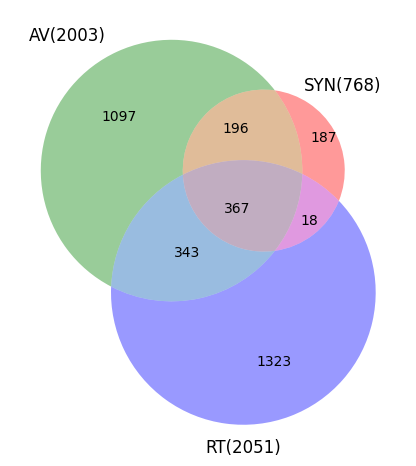

In [3]:
# compare all metabolites across the three models
av_m = [i.id for i in av.metabolites]
syn_m = [i.id for i in syn.metabolites]
rt_m = [i.id for i in rt.metabolites]
create_venn3(av_m, syn_m, rt_m, 'AV', 'SYN', 'RT')
plt.savefig('metabolites_overlap.png', dpi=300)

We are interesting in metabolites that are imported/exported between the organisms.

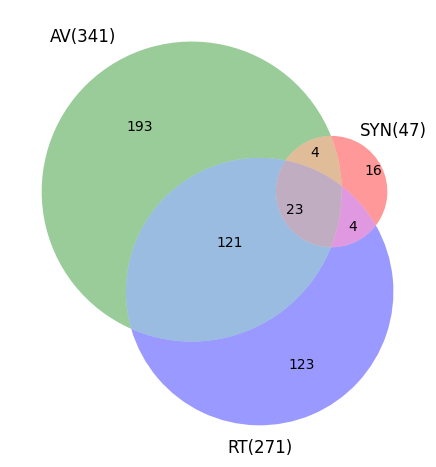

In [4]:
# comparing IDs
# compartment _e == extra_cellular

av_m = [i.id for i in av.metabolites if i.compartment == 'e']
syn_m = [i.id for i in syn.metabolites if i.compartment == 'e']
rt_m = [i.id for i in rt.metabolites if i.compartment == 'e']
create_venn3(av_m, syn_m, rt_m, 'AV', 'SYN', 'RT');

In [5]:
external_metabolites = set(av_m).union(syn_m).union(rt_m)
with open('external_metabolites.xt', 'w') as f:
    for i in external_metabolites:
        f.writelines(i.rstrip('_e')+'\n')
      

In [6]:
print(len(external_metabolites))

484


In [41]:
import requests
def get_map(bigg_id):
    new_id = bigg_id[:-2]
    try:
        r = requests.get(f'http://bigg.ucsd.edu/api/v2/universal/metabolites/{new_id}')
        results = r.json()
    except Exception as e:
        return None
    simple_dict = dict()
    for i in results['database_links']:
        simple_dict[i] = [results['database_links'][i][0]['id']]
    return simple_dict

In [ ]:
def generate_id_mapper(metabolite_list):
    no_response = []
    no_biocyc_meta = []
    mapper = dict()
    for i in list(metabolite_list):
        r = get_map(i)
        if r is None:
            no_biocyc_meta.append(i)
        elif len(r) == 0:
            no_response.append(i)
        else:
            mapper[i] = r

    print(len(no_biocyc_meta))
    print(len(no_response))
    return mapper, no_biocyc_meta, no_response

In [31]:
mapper, no_biocyc_meta, no_response = generate_id_mapper(external_metabolites)

{'butso3_e': {'MetaNetX (MNX) Chemical': ['MNXM7138'],
  'SEED Compound': ['cpd11596']},
 'maltttr_e': {'InChI Key': ['LUEWUZLMQUOBSB-ZLBHSGTGSA-N'],
  'SEED Compound': ['cpd01376'],
  'CHEBI': ['CHEBI:25145'],
  'Human Metabolome Database': ['HMDB01296'],
  'MetaNetX (MNX) Chemical': ['MNXM5663'],
  'KEGG Glycan': ['G00459'],
  'KEGG Compound': ['C02013'],
  'BioCyc': ['META:CPD0-2595']},
 '4hbz_e': {'InChI Key': ['FJKROLUGYXJWQN-UHFFFAOYSA-M'],
  'Reactome Compound': ['2162213'],
  'SEED Compound': ['cpd00136'],
  'CHEBI': ['CHEBI:12003'],
  'Human Metabolome Database': ['HMDB00500'],
  'MetaNetX (MNX) Chemical': ['MNXM164'],
  'KEGG Compound': ['C00156'],
  'BioCyc': ['META:4-hydroxybenzoate']},
 'phenol_e': {'InChI Key': ['ISWSIDIOOBJBQZ-UHFFFAOYSA-N'],
  'Reactome Compound': ['158858'],
  'SEED Compound': ['cpd00127'],
  'CHEBI': ['CHEBI:14777'],
  'Human Metabolome Database': ['HMDB00228'],
  'KEGG Compound': ['C00146'],
  'MetaNetX (MNX) Chemical': ['MNXM320'],
  'KEGG Drug': ['

In [37]:
for i in sorted(no_response):
    print(i.rstrip('_e'))

4abzglu
colipacy
cs1
dhps
dxylnt
f
mepn
metglcur
photon410
photon430
photon470
photon510
photon530
photon550
photon570
photon590
photon610
photon630
photon650
photon670
photon690
psuri
sq


In [35]:
for i in sorted(no_biocyc_meta):
    print(i.rstrip('_e'))

alg
cholat
gxl
indol
lipoat
pc_RT
pe_RT
phem
ptd1ino_RT
tr
urat


In [36]:
no_biocyc_meta

['urate_e',
 'gxl_e',
 'pc_RT_e',
 'indole_e',
 'pheme_e',
 'lipoate_e',
 'cholate_e',
 'pe_RT_e',
 'tre_e',
 'alg_e',
 'ptd1ino_RT_e']

In [15]:
unique_to_rt = set(rt_m).difference(syn_m).difference(av_m)

unique_to_syn = set(syn_m).difference(rt_m).difference(av_m)

unique_to_av = set(av_m).difference(rt_m).difference(syn_m)

In [16]:
for i in [unique_to_av, unique_to_rt, unique_to_syn]:
    print(len(i))

193
123
16


In [17]:
for i in unique_to_syn:
    print(i)

photon410_e
photon430_e
photon550_e
photon470_e
photon510_e
photon610_e
photon490_e
photon590_e
photon630_e
photon450_e
photon570_e
colipacy_e
photon670_e
photon690_e
photon650_e
photon530_e


### Find metabolites that 'could' be missing from models

In [18]:
def check_metab_in_org(to_inspect, organism_background):
    background_core = [i.rsplit('_', 1)[0] for i in organism_background]
    found_in_org = set()
    for met in to_inspect:
        met_core = met.rsplit('_', 1)[0]
        if met_core in background_core:
            found_in_org.add(met_core)
    return found_in_org

In [ ]:
check_metab_in_org(set(syn_m).difference(av_m), av_all)

In [48]:
check_metab_in_org(set(rt_m).difference(av_m), av_all)

{'2doxg6p',
 '2pg',
 '35cgmp',
 '3pg',
 '3sala',
 '4abz',
 '4hbz',
 '5aop',
 '6pgc',
 'Lcyst',
 'acgam',
 'acglu',
 'agm',
 'alltt',
 'amet',
 'arg__L',
 'btd_RR',
 'camp',
 'cbp',
 'cholate',
 'citr__L',
 'cys__L',
 'cyst__L',
 'etha',
 'fol',
 'gam',
 'ghb',
 'glu__L',
 'gly',
 'hco3',
 'hom__L',
 'ile__L',
 'leu__L',
 'man1p',
 'met__L',
 'mthgxl',
 'oxa',
 'pep',
 'phe__L',
 'ppi',
 'pppi',
 'pro__L',
 'ptrc',
 'ribflv',
 'sprm',
 'thmmp',
 'thmpp',
 'trp__L',
 'tyr__L',
 'val__L',
 'xylu__D'}

In [20]:
check_metab_in_org(set(av_m).difference(rt_m), rt_all)

{'2dglc',
 '34dhpac',
 '3hcinnm',
 '3hpp',
 '3hpppn',
 '4hoxpacd',
 '4hphac',
 'acald',
 'acgam1p',
 'acon_C',
 'acser',
 'ascb__L',
 'crn',
 'cyan',
 'cynt',
 'damp',
 'dcmp',
 'dcyt',
 'dgmp',
 'dgsn',
 'dimp',
 'dopa',
 'dump',
 'duri',
 'etoh',
 'fad',
 'fald',
 'g3pg',
 'g3ps',
 'gal1p',
 'gbbtn',
 'gdp',
 'glyald',
 'gthox',
 'gtp',
 'h2s',
 'hxan',
 'imp',
 'indole',
 'lipoate',
 'malthx',
 'maltpt',
 'maltttr',
 'mmet',
 'mobd',
 'nmn',
 'o2s',
 'octa',
 'orot',
 'pacald',
 'pheme',
 'phenol',
 'ppal',
 'progly',
 'psuri',
 'pydam',
 'pydx',
 'r5p',
 'sel',
 'skm',
 'tcynt',
 'ttdcea',
 'tungs',
 'uacgam',
 'udcpp',
 'udpacgal',
 'udpg',
 'udpgal',
 'udpglcur',
 'xmp',
 'xylu__L'}

In [21]:
check_metab_in_org(set(syn_m).difference(rt_m), rt_all)

{'cynt', 'mobd'}

In [49]:
check_metab_in_org(set(rt_m).difference(syn_m), syn_all)

{'2obut',
 '2pg',
 '3pg',
 '4abz',
 '4hbz',
 '5aop',
 '6pgc',
 'ac',
 'acgam',
 'acglu',
 'ade',
 'adn',
 'agm',
 'akg',
 'ala_B',
 'ala__D',
 'ala__L',
 'amet',
 'amp',
 'asn__L',
 'asp__L',
 'btn',
 'cbp',
 'cgly',
 'cit',
 'citr__L',
 'cmp',
 'cys__L',
 'dad_2',
 'dtmp',
 'f6p',
 'fmn',
 'for',
 'fru',
 'fum',
 'g1p',
 'g6p',
 'gam6p',
 'glc__D',
 'glu__L',
 'glx',
 'gly',
 'glyc',
 'glyc3p',
 'glyc__R',
 'glyclt',
 'glycogen',
 'gmp',
 'gthrd',
 'h2o2',
 'hom__L',
 'ile__L',
 'inost',
 'lac__D',
 'lys__L',
 'mal__L',
 'man1p',
 'man6p',
 'met__L',
 'mthgxl',
 'nac',
 'ocdca',
 'orn',
 'oxa',
 'pep',
 'pg1819Z160',
 'pgp1819Z160',
 'phe__L',
 'pnto__R',
 'ppi',
 'pppi',
 'pro__L',
 'pser__L',
 'pyr',
 'ribflv',
 'ser__L',
 'so3',
 'sprm',
 'succ',
 'sucr',
 'thmmp',
 'thmpp',
 'thr__L',
 'trp__L',
 'tyr__L',
 'ump',
 'ura',
 'val__L'}

In [28]:
check_metab_in_org(set(av_m).difference(syn_m), syn_all)

{'2obut',
 '2pg',
 '3pg',
 '4abz',
 '4hbz',
 '5aop',
 '6pgc',
 'ac',
 'acgam',
 'acglu',
 'ade',
 'adn',
 'agm',
 'akg',
 'ala_B',
 'ala__D',
 'ala__L',
 'amet',
 'amp',
 'asn__L',
 'asp__L',
 'btn',
 'cbp',
 'cgly',
 'cit',
 'citr__L',
 'cmp',
 'cys__L',
 'dad_2',
 'dtmp',
 'f6p',
 'fmn',
 'for',
 'fru',
 'fum',
 'g1p',
 'g6p',
 'gam6p',
 'glc__D',
 'glu__L',
 'glx',
 'gly',
 'glyc',
 'glyc3p',
 'glyc__R',
 'glyclt',
 'glycogen',
 'gmp',
 'gthrd',
 'h2o2',
 'hom__L',
 'ile__L',
 'inost',
 'lac__D',
 'lys__L',
 'mal__L',
 'man1p',
 'man6p',
 'met__L',
 'mthgxl',
 'nac',
 'ocdca',
 'orn',
 'oxa',
 'pep',
 'pg1819Z160',
 'pgp1819Z160',
 'phe__L',
 'pnto__R',
 'ppi',
 'pppi',
 'pro__L',
 'pser__L',
 'pyr',
 'ribflv',
 'ser__L',
 'so3',
 'sprm',
 'succ',
 'sucr',
 'thmmp',
 'thmpp',
 'thr__L',
 'trp__L',
 'tyr__L',
 'ump',
 'ura',
 'val__L'}

In [29]:
check_metab_in_org(unique_to_syn, av_all)

set()

In [30]:
check_metab_in_org(unique_to_syn, rt_all)

set()

In [31]:
check_metab_in_org(unique_to_rt, av_all)

{'2doxg6p',
 '2pg',
 '35cgmp',
 '3pg',
 '3sala',
 '4abz',
 '4hbz',
 '5aop',
 '6pgc',
 'Lcyst',
 'acgam',
 'acglu',
 'agm',
 'alltt',
 'amet',
 'btd_RR',
 'camp',
 'cbp',
 'cholate',
 'citr__L',
 'cys__L',
 'cyst__L',
 'etha',
 'fol',
 'gam',
 'ghb',
 'glu__L',
 'gly',
 'hom__L',
 'ile__L',
 'man1p',
 'met__L',
 'mthgxl',
 'oxa',
 'pep',
 'phe__L',
 'ppi',
 'pppi',
 'pro__L',
 'ribflv',
 'sprm',
 'thmmp',
 'thmpp',
 'trp__L',
 'tyr__L',
 'val__L',
 'xylu__D'}

In [32]:
check_metab_in_org(unique_to_av, rt_all)

{'2dglc',
 '34dhpac',
 '3hcinnm',
 '3hpp',
 '3hpppn',
 '4hoxpacd',
 '4hphac',
 'acald',
 'acgam1p',
 'acon_C',
 'acser',
 'ascb__L',
 'crn',
 'cyan',
 'damp',
 'dcmp',
 'dcyt',
 'dgmp',
 'dgsn',
 'dimp',
 'dopa',
 'dump',
 'duri',
 'etoh',
 'fad',
 'fald',
 'g3pg',
 'g3ps',
 'gal1p',
 'gbbtn',
 'gdp',
 'glyald',
 'gthox',
 'gtp',
 'h2s',
 'hxan',
 'imp',
 'indole',
 'lipoate',
 'malthx',
 'maltpt',
 'maltttr',
 'mmet',
 'nmn',
 'o2s',
 'octa',
 'orot',
 'pacald',
 'pheme',
 'phenol',
 'ppal',
 'progly',
 'psuri',
 'pydam',
 'pydx',
 'r5p',
 'sel',
 'skm',
 'tcynt',
 'ttdcea',
 'tungs',
 'uacgam',
 'udcpp',
 'udpacgal',
 'udpg',
 'udpgal',
 'udpglcur',
 'xmp',
 'xylu__L'}

### Explore code that could be useful below

In [33]:
for r in rt.reactions:
    if 'Lcyst_e' in set(m.id for m in r.metabolites):
        print(r)

EX_Lcyst_e: Lcyst_e --> 
LCYSTt: Lcyst_e + cl_e + 2.0 na1_e <=> Lcyst_c + cl_c + 2.0 na1_c


In [ ]:
for r in av.reactions:
    if '_e' in set(m.id. for m in r.metabolites):
        print(r)

In [74]:
new_model = cobra.Model()

In [78]:
for i in syn.reactions:
    if 'e' in i.compartments:
        new_model.add_reaction(i)
        print(i)

Ignoring reaction 'EX_gln__L_e' since it already exists.
Ignoring reaction 'EX_hco3_e' since it already exists.
Ignoring reaction 'EX_mn2_e' since it already exists.
Ignoring reaction 'EX_arg__L_e' since it already exists.
Ignoring reaction 'Htex' since it already exists.
Ignoring reaction 'H2Otex' since it already exists.
Ignoring reaction 'EX_mg2_e' since it already exists.
Ignoring reaction 'O2tex' since it already exists.
Ignoring reaction 'EX_ptrc_e' since it already exists.
Ignoring reaction 'BIOMASS_CELL_WALL' since it already exists.
Ignoring reaction 'EX_ca2_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'MG2tex' since it already exists.
Ignoring reaction 'CO2tex' since it already exists.
Ignoring reaction 'EX_fe2_e' since it already exists.
Ignoring reaction 'EX_cu2_e' since it already exists.
Ignoring reaction 'EX_k_e' since it already exists.
Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_o2_e

EX_gln__L_e: gln__L_e --> 
EX_hco3_e: hco3_e <=> 
EX_mn2_e: mn2_e <=> 
EX_arg__L_e: arg__L_e --> 
Htex: h_e <=> h_p
H2Otex: h2o_e <=> h2o_p
EX_mg2_e: mg2_e <=> 
O2tex: o2_e <=> o2_p
EX_ptrc_e: ptrc_e --> 
BIOMASS_CELL_WALL: 0.694139 colipacy_e + 0.192214 murein5p5p5p_p --> bm_cw_c
EX_ca2_e: ca2_e <=> 
EX_nh4_e: nh4_e <=> 
MG2tex: mg2_e <=> mg2_p
CO2tex: co2_e <=> co2_p
EX_fe2_e: fe2_e --> 
EX_cu2_e: cu2_e <=> 
EX_k_e: k_e <=> 
EX_h2o_e: h2o_e <=> 
EX_o2_e: o2_e <=> 
EX_co2_e: co2_e <=> 
EX_leu__L_e: leu__L_e <-- 
EX_cobalt2_e: cobalt2_e <=> 
EX_no3_e: no3_e <=> 
EX_zn2_e: zn2_e <=> 
EX_fe3_e: fe3_e <=> 
EX_so4_e: so4_e <=> 
EX_spmd_e: spmd_e --> 
EX_mobd_e: mobd_e <=> 
EX_ni2_e: ni2_e --> 
EX_na1_e: na1_e <=> 
EX_cynt_e: cynt_e --> 
EX_h_e: h_e <=> 
FE3tex: fe3_e <=> fe3_p
FE2tex: fe2_e <=> fe2_p
NI2tex: ni2_e <=> ni2_p
MNtex: mn2_e <=> mn2_p
COBALT2tex: cobalt2_e <=> cobalt2_p
CU2tex: cu2_e <=> cu2_p
MEOHtex: meoh_e <=> meoh_p
Zn2tex: zn2_e <=> zn2_p
EX_photon410_e: photon410_e <=> 
E

In [84]:
new_model.reactions.FE2tex

Reaction identifier,FE2tex
Name,Iron (II) transport via diffusion (extracellular to periplasm)
Memory address,0x29fc45621a0
Stoichiometry,fe2_e <=> fe2_p Fe2+ mitochondria <=> Fe2+ mitochondria
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [86]:
new_model.reactions.EX_fe2_e

Reaction identifier,EX_fe2_e
Name,Fe2+ exchange
Memory address,0x29fc450f4c0
Stoichiometry,fe2_e --> Fe2+ mitochondria -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [77]:
new_model.metabolites[0]

Metabolite identifier,gln__L_e
Name,L-Glutamine
Memory address,0x29fc32f8e20
Formula,C5H10N2O3
Compartment,e
In 2 reaction(s),"GLNtex, EX_gln__L_e"


In [35]:
for r in rt.metabolites.gxl_e.reactions:
    print(r)

GXLOe: gxl_e + h2o_e + o2_e --> glx_e + h2o2_e + h_e


In [36]:
rt.metabolites.gxl_e

Metabolite identifier,gxl_e
Name,Glyoxal
Memory address,0x29fc2fd1a80
Formula,C2H2O2
Compartment,e
In 1 reaction(s),GXLOe


In [38]:
vars(av.metabolites[0])

{'_id': '2pg_c_u',
 'name': 'D-Glycerate 2-phosphate',
 'notes': {},
 '_annotation': {'sbo': 'SBO:0000240'},
 '_model': <Model COBRAModel at 0x29fb8a13730>,
 '_reaction': {<Reaction ENO at 0x29fc1c396c0>,
  <Reaction GLYCK2 at 0x29fc1e83490>,
  <Reaction PGM at 0x29fc267e7a0>},
 'formula': 'C3H4O7P',
 'compartment': 'u',
 'charge': 0,
 '_bound': 0.0}

In [50]:
# !pip install escher
import escher
from escher import Builder

In [45]:
builder = Builder(
    model=av
)


In [46]:
builder

Builder()

In [42]:
escher.list_available_maps()


[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

In [43]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [44]:
builder

Builder()